Wykorzystując przekazaną implementację ANFIS, naucz system go tabliczki mnożenia.  
Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5).   
Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki.   
Zrób wykres wymiaru tabliczki od czasu uczenia.

In [29]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Prepare data

In [30]:
RANGE = 2.1
RESOLUTION = 0.1


def prepare_data(range, resolution): 
    x = np.arange(0, range, resolution)
    x, y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY1 = np.column_stack((dataX, dataY, np.ones(len(dataX))))
    dataXY = np.column_stack((dataX, dataY))

    data_labels = np.round(dataX) * np.round(dataY)

    return dataX, dataY, dataXY, data_labels


def visualization_of_data(dataX, dataY, data_labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', azim=45, elev=20)
    ax.invert_xaxis()
    ax.invert_yaxis()

    ax.scatter(dataX, dataY, data_labels, c="red")
    plt.title(f"Wzór danych: {range}x{range}")
    plt.show()

In [31]:
dataX, dataY, dataXY, data_labels = prepare_data(RANGE, RESOLUTION)

# Create membership functions

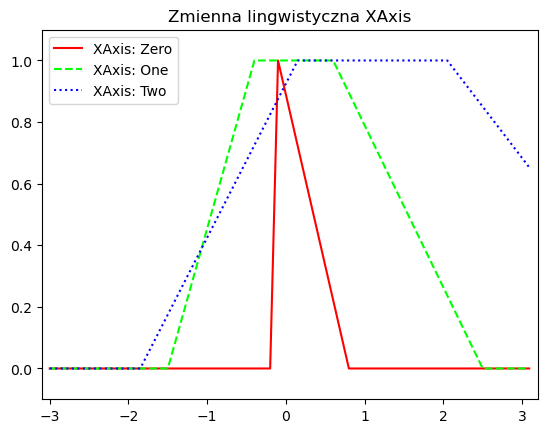

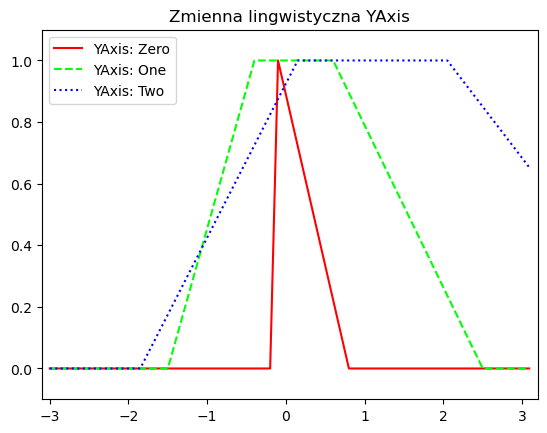

In [32]:

mf1 = [[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 3.0]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["Zero","One", "Two"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["Zero","One", "Two"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

# Initialization of ANFIS model

Parametry początkowe:
Przesłanki:  [[[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 3.0]], [[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 3.0]]] 
Konkluzje:  [[0.00167353 0.14684278 0.30667143]
 [0.8106622  0.44195695 0.6699619 ]
 [0.83200255 0.4760672  0.03975643]
 [0.51596246 0.15969542 0.37970391]
 [0.4982728  0.50380854 0.47624668]
 [0.32818721 0.33633142 0.96300106]
 [0.86864997 0.32354664 0.77495849]
 [0.84560636 0.96675313 0.49247279]
 [0.72526518 0.54931391 0.55066884]]


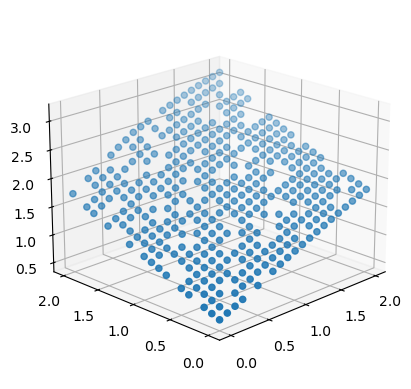

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

# Learning ANFIS System

d:\NewWorkspaceVSC\MSI\2_Term_MSI\ANFIS.py:89: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   2.2342083068401615
Liczba ew:  143395
Liczba it:  50
TIME elapsed:  38.197402477264404


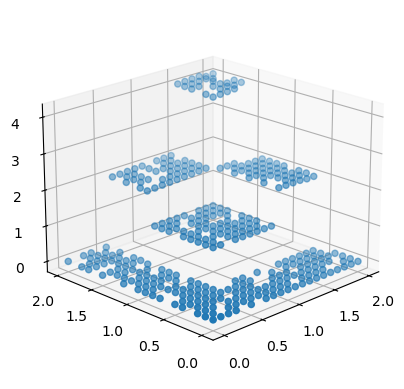

In [34]:
time_storage = []

start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
elapsed_time = end - start

time_storage.append(elapsed_time)

print("TIME elapsed: ", elapsed_time)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

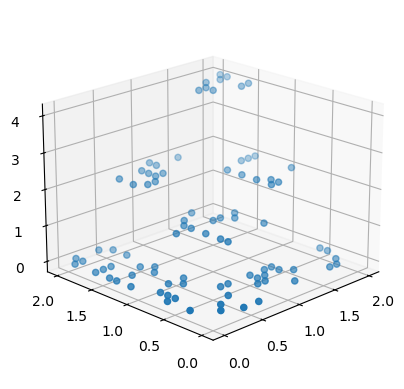

[[46  0  0  0]
 [ 0 13  0  0]
 [ 0  0 21  0]
 [ 0  0  0  9]]


In [35]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

# Visualization of results 

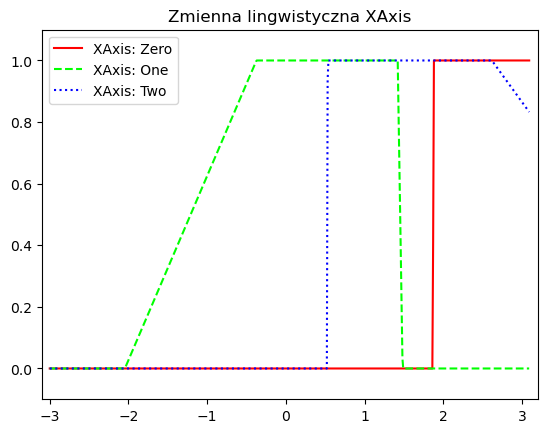

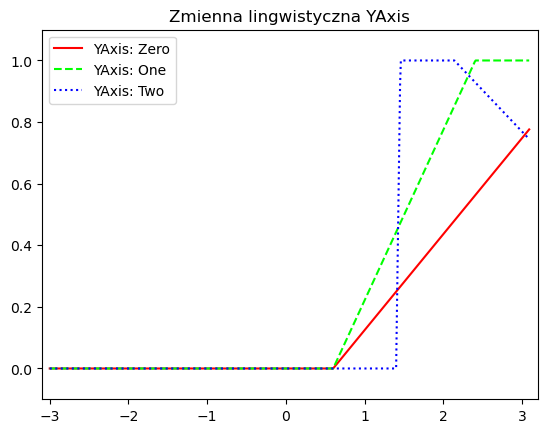

In [36]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [37]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[[2.67352276e+00, 1.61530539e+00, 2.70612700e-13, 1.83034268e+00],
        [5.23185477e-01, 1.79467677e+00, 1.67117427e+00, 6.15010359e-02],
        [1.57231439e+00, 2.08720310e+00, 8.07973910e-03, 2.83607829e+00]],

       [[3.86362079e+00, 1.11149866e-01, 3.20787147e+00, 2.24170327e+00],
        [3.99469468e+00, 3.17641026e+00, 1.80651971e+00, 3.71681877e+00],
        [1.79712479e+00, 6.85498450e-01, 5.40665737e-02, 3.72294039e+00]]]) 
Konkluzje:  array([[5.05946625e-02, 1.50499250e-09, 1.99802952e+00],
       [3.10170944e-05, 2.44543423e-10, 2.38952377e-10],
       [5.53250369e-10, 1.26575045e-03, 1.99857184e+00],
       [6.13709358e-04, 4.76678756e-10, 1.94767025e+00],
       [1.74486936e-10, 1.03300073e-10, 1.10137022e-11],
       [1.68920155e-07, 1.26322507e-07, 1.99999986e+00],
       [5.38635182e-01, 1.61514897e+00, 1.99816723e+00],
       [9.77687674e-02, 8.67046400e-09, 2.59257526e-10],
       [3.04962942e-01, 2.00000000e+00, 2.00000000e

# Checking influence of parameters on results of system

d:\NewWorkspaceVSC\MSI\2_Term_MSI\ANFIS.py:89: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


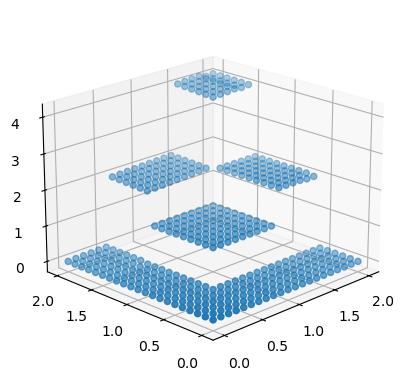

In [38]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

# 3x3

Parametry początkowe:
Przesłanki:  [[[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 2.9], [2.1, 2.9, 3.0, 3.9]], [[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 2.9], [2.1, 2.9, 3.0, 3.9]]] 
Konkluzje:  [[0.21944168 0.13432294 0.84727163]
 [0.38269441 0.52636904 0.55023288]
 [0.58157347 0.84206001 0.60508549]
 [0.25266807 0.78500858 0.99188859]
 [0.19526328 0.88692678 0.50132944]
 [0.30694931 0.12099769 0.47451481]
 [0.40902133 0.83736033 0.79924871]
 [0.47531566 0.89393642 0.68543044]
 [0.29938401 0.33299482 0.44272554]
 [0.12739189 0.42292595 0.77577717]
 [0.48584298 0.47583792 0.76165097]
 [0.96507578 0.40163265 0.60153405]
 [0.90272378 0.39595911 0.4123685 ]
 [0.23180936 0.07638644 0.69744305]
 [0.6000185  0.76424598 0.84916686]
 [0.09551195 0.13548991 0.77211358]]


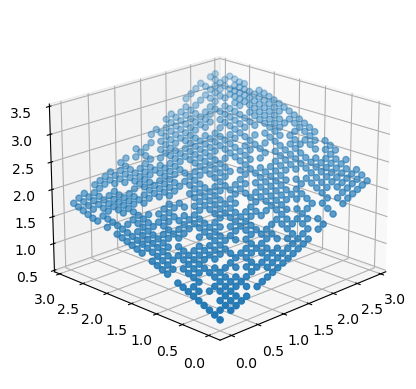

d:\NewWorkspaceVSC\MSI\2_Term_MSI\ANFIS.py:89: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   85.35603814987121
Liczba ew:  340460
Liczba it:  50
TIME elapsed:  141.6048550605774


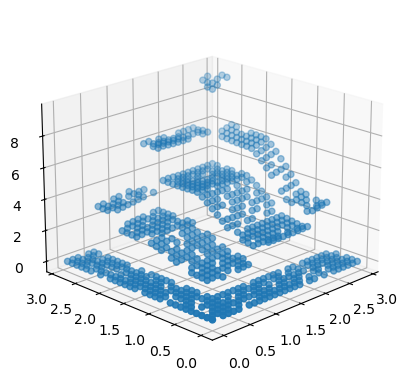

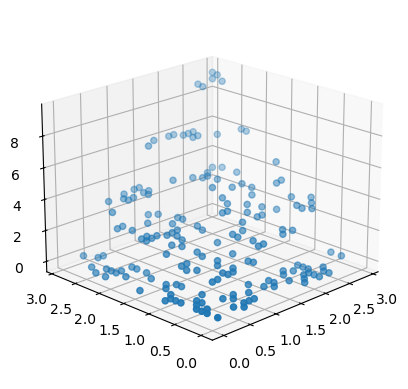

[[66  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0]
 [ 0  1 36  5  0  0  0  0]
 [ 0  0  0 17  2  0  0  0]
 [ 0  0  0  2 14  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 12  0]
 [ 0  0  0  0  0  0  0  6]]
Parametry końcowe:
Przesłanki:  array([[[2.55549397, 0.05399904, 1.25590221, 0.00432422],
        [0.7954845 , 1.21389502, 0.5413144 , 0.09921259],
        [3.99038897, 0.00424604, 2.57812698, 2.86887186],
        [2.0703772 , 2.94147964, 0.09514832, 3.9       ]],

       [[0.3447038 , 0.2404095 , 3.49666147, 0.13460152],
        [1.80057177, 1.3989875 , 0.50174956, 0.10287285],
        [3.10079483, 0.51537781, 1.00379407, 2.95285295],
        [2.41549541, 1.30760699, 1.16245764, 3.89614616]]]) 
Konkluzje:  array([[1.36038222e-10, 2.38670514e-10, 6.54257088e-11],
       [1.28610696e-10, 5.30532306e-11, 2.15495024e-10],
       [1.32211960e-10, 1.47677309e-10, 5.31121265e-11],
       [5.13635997e-10, 9.25494718e-11, 2.83343874e-10],
       [1.43942111e-11, 5.96462126e-10, 6.

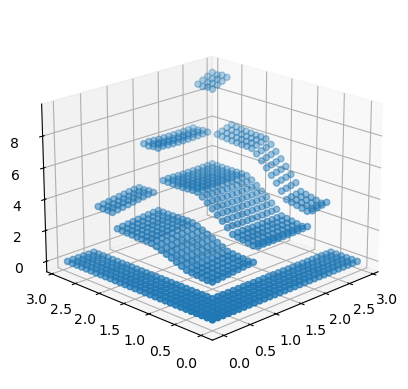

In [40]:
RANGE = 3
dataX, dataY, dataXY, data_labels = prepare_data(RANGE, RESOLUTION)


mf1 = [[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 2.9], [2.1, 2.9, 3.0, 3.9]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["Zero","One", "Two", "Three"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["Zero","One", "Two", "Three"])

# #Wyświetlanie funkcji przynależnosci
# plt.figure()
# varX.show()
# plt.legend()

# plt.figure()
# varY.show()
# plt.legend()

# plt.show()

X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

time_storage = []

start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
elapsed_time = end - start

time_storage.append(elapsed_time)

print("TIME elapsed: ", elapsed_time)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

#Wyświetlanie funkcji przynależnosci
# plt.figure()
# varX.show()
# plt.legend()

# plt.figure()
# varY.show()
# plt.legend()

# plt.show()

print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

# 4x4

Parametry początkowe:
Przesłanki:  [[[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 2.9], [2.1, 2.9, 3.0, 3.9], [3.1, 3.9, 4.0, 4.9]], [[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 2.9], [2.1, 2.9, 3.0, 3.9], [3.1, 3.9, 4.0, 4.9]]] 
Konkluzje:  [[0.90038434 0.77280315 0.55086144]
 [0.56360447 0.34977394 0.95929106]
 [0.89391771 0.20578307 0.93166694]
 [0.61802249 0.9822124  0.25515272]
 [0.60460034 0.71124125 0.97006891]
 [0.0878606  0.43028385 0.04516213]
 [0.96358541 0.52840327 0.04780846]
 [0.51233416 0.57908696 0.05528963]
 [0.50402034 0.61465423 0.82915967]
 [0.0092157  0.51690065 0.80770841]
 [0.71080235 0.35396734 0.10796717]
 [0.10333944 0.26726349 0.84043857]
 [0.82746569 0.45735744 0.79539097]
 [0.4204836  0.28606731 0.5834024 ]
 [0.41135044 0.53835706 0.92680543]
 [0.87493918 0.49075158 0.52730457]
 [0.88367261 0.59897265 0.22746023]
 [0.45676163 0.72052529 0.8303216 ]
 [0.66345041 0.86666443 0.40430855]
 [0.61863209 0.43261879 0.83332871]
 [0.53951

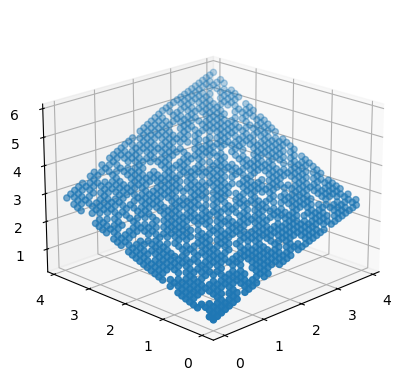

d:\NewWorkspaceVSC\MSI\2_Term_MSI\ANFIS.py:89: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   92.80056339532882
Liczba ew:  465257
Liczba it:  50
TIME elapsed:  364.08340716362


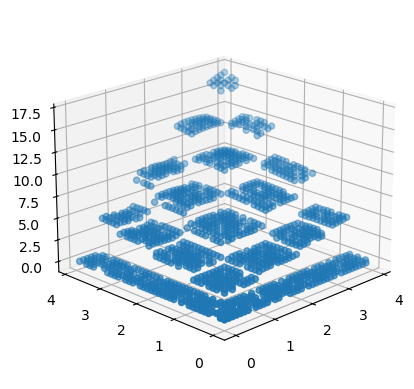

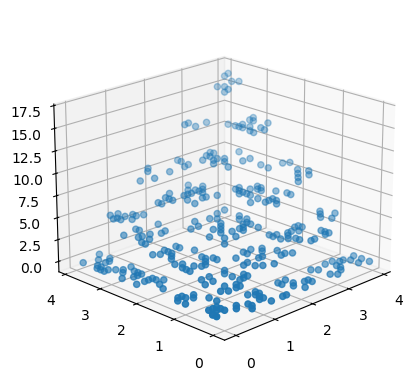

[[87  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 41  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 41  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  6]]
Parametry końcowe:
Przesłanki:  array([[[0.4399692 , 1.93297742, 2.10524985, 0.08982112],
        [1.05680133, 0.90021709, 0.10089228, 0.74287184],
        [1.98360118, 1.035224  , 0.94004034, 0.09047767],
        [2.1627681 , 1.11401379, 0.21338284, 1.1802251 ],
        [2.7167197 , 1.48748428, 0.75824448, 0.03836006]],

       [[1.48055413, 0.01280277, 0.07492831, 2.36751862],
        [1.87405207, 1.3527401 , 2.53805849, 0.04874048],
        [0.86

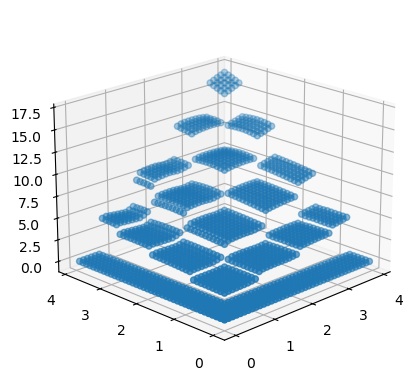

In [41]:
RANGE = 4
dataX, dataY, dataXY, data_labels = prepare_data(RANGE, RESOLUTION)


mf1 = [[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 2.9], [2.1, 2.9, 3.0, 3.9], [3.1, 3.9, 4.0, 4.9]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["Zero","One", "Two", "Three", "Four"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["Zero","One", "Two", "Three", "Four"])

# #Wyświetlanie funkcji przynależnosci
# plt.figure()
# varX.show()
# plt.legend()

# plt.figure()
# varY.show()
# plt.legend()

# plt.show()

X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

time_storage = []

start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
elapsed_time = end - start

time_storage.append(elapsed_time)

print("TIME elapsed: ", elapsed_time)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

#Wyświetlanie funkcji przynależnosci
# plt.figure()
# varX.show()
# plt.legend()

# plt.figure()
# varY.show()
# plt.legend()

# plt.show()

print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

# 5x5

Parametry początkowe:
Przesłanki:  [[[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 2.9], [2.1, 2.9, 3.0, 3.9], [3.1, 3.9, 4.0, 4.9], [4.1, 4.9, 5.0, 5.9]], [[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 2.9], [2.1, 2.9, 3.0, 3.9], [3.1, 3.9, 4.0, 4.9], [4.1, 4.9, 5.0, 5.9]]] 
Konkluzje:  [[0.80833249 0.10910004 0.75413236]
 [0.09394067 0.41572648 0.12588842]
 [0.43187377 0.01686859 0.75044011]
 [0.56833213 0.24493446 0.51566364]
 [0.75550413 0.69367256 0.54899848]
 [0.18968075 0.50627342 0.43087941]
 [0.73704245 0.11618143 0.37516858]
 [0.53546313 0.24118283 0.15293325]
 [0.12465847 0.23533539 0.63919527]
 [0.21188798 0.91091461 0.28227819]
 [0.97946489 0.66854448 0.61227706]
 [0.05182529 0.06773012 0.68383921]
 [0.31977719 0.62943072 0.32298087]
 [0.70145195 0.03608521 0.05989044]
 [0.66132781 0.28901604 0.2232691 ]
 [0.39143857 0.42841502 0.50909509]
 [0.41080887 0.83120094 0.98183404]
 [0.14755972 0.48717136 0.81739186]
 [0.04007992 0.23770259 0.606327  ]
 

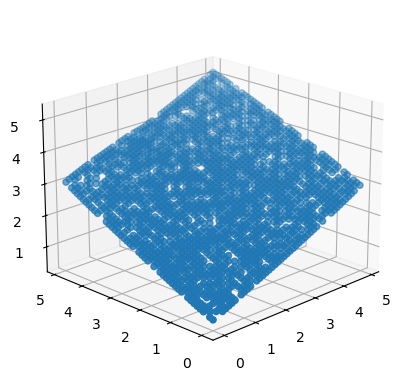

d:\NewWorkspaceVSC\MSI\2_Term_MSI\ANFIS.py:89: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   900.4748694050979
Liczba ew:  493757
Liczba it:  50
TIME elapsed:  1470.7853999137878


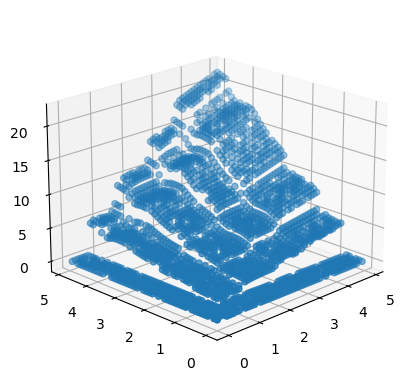

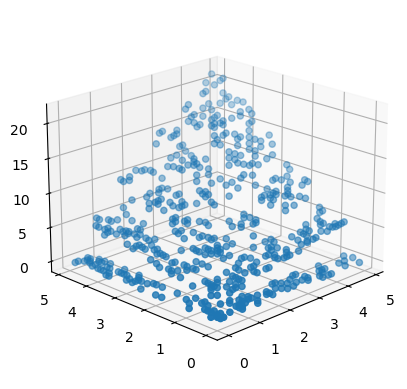

[[115   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  33   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   1  27   7   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   4  55   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   3  16   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   8  18   4   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   7  31   7   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   4   6   5   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0 

d:\NewWorkspaceVSC\MSI\2_Term_MSI\ANFIS.py:89: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


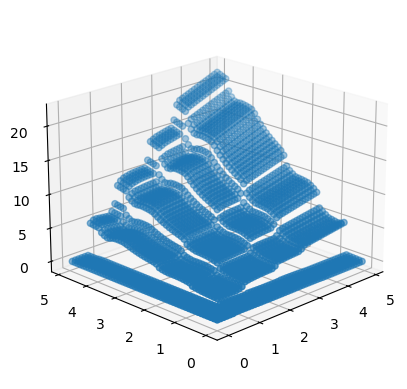

In [42]:
RANGE = 5
dataX, dataY, dataXY, data_labels = prepare_data(RANGE, RESOLUTION)


mf1 = [[-0.1, 0, 0.1, 0.9], [0.1, 1.0, 1.1, 1.9], [1.1, 1.9, 2.0, 2.9], [2.1, 2.9, 3.0, 3.9], [3.1, 3.9, 4.0, 4.9], [4.1, 4.9, 5.0, 5.9]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["Zero","One", "Two", "Three", "Four", "Five"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["Zero","One", "Two", "Three", "Four", "Five"])

# #Wyświetlanie funkcji przynależnosci
# plt.figure()
# varX.show()
# plt.legend()

# plt.figure()
# varY.show()
# plt.legend()

# plt.show()

X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

time_storage = []

start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
elapsed_time = end - start

time_storage.append(elapsed_time)

print("TIME elapsed: ", elapsed_time)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

#Wyświetlanie funkcji przynależnosci
# plt.figure()
# varX.show()
# plt.legend()

# plt.figure()
# varY.show()
# plt.legend()

# plt.show()

print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

# Comparison

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

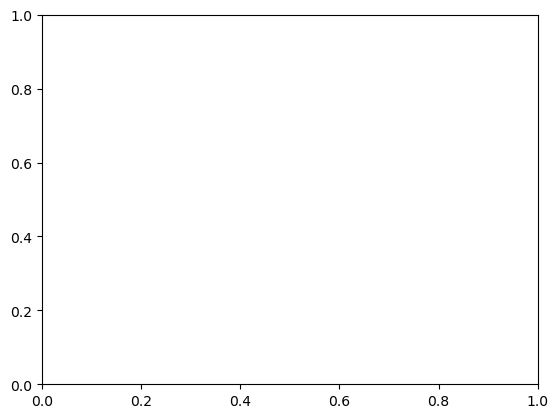

In [43]:
plt.plot([2, 3, 4, 5], elapsed_time, c=["red", "green", "orange", "gray"], labels=["Size: 2x2", "Size: 3x3", "Size: 4x4", "Size: 5x5"])
plt.xlabel("Size of the table")
plt.ylabel("Elapsed time")
plt.show()